## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

## Librerias

In [2]:
import sklearn
print(sklearn.__version__)

1.3.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/UDD DS AI/Modulo 7/Prueba 7/googleplaystore.csv')

In [6]:
df_reviews = pd.read_csv('/content/drive/MyDrive/UDD DS AI/Modulo 7/Prueba 7/googleplaystore_user_reviews.csv')

## Analisis exploratorio de DF - googleplaystore.cvs

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.shape

(10841, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [11]:
#Eliminamos valores nulos de las coumnas
columnas_con_nulos = ['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']
df = df.dropna(subset=columnas_con_nulos)

In [12]:
# Quedan 9360 valores.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [13]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [14]:
df['Category'].value_counts().reset_index()

,Category,count
0,FAMILY,1746
1,GAME,1097
2,TOOLS,733
3,PRODUCTIVITY,351
4,MEDICAL,350
5,COMMUNICATION,328
6,FINANCE,323
7,SPORTS,319
8,PHOTOGRAPHY,317
9,LIFESTYLE,314


In [15]:
df['Installs'].value_counts().reset_index()

,Installs,count
0,"1,000,000+",1576
1,"10,000,000+",1252
2,"100,000+",1150
3,"10,000+",1009
4,"5,000,000+",752
5,"1,000+",712
6,"500,000+",537
7,"50,000+",466
8,"5,000+",431
9,"100,000,000+",409


In [16]:
df['Type'].value_counts().reset_index()


,Type,count
0,Free,8715
1,Paid,645


In [17]:
df['Price'].value_counts().reset_index()

,Price,count
0,0,8715
1,$2.99,114
2,$0.99,106
3,$4.99,70
4,$1.99,59
...,...,...
68,$1.29,1
69,$299.99,1
70,$379.99,1
71,$37.99,1


In [18]:
df['Content Rating'].value_counts().reset_index()

,Content Rating,count
0,Everyone,7414
1,Teen,1084
2,Mature 17+,461
3,Everyone 10+,397
4,Adults only 18+,3
5,Unrated,1


In [19]:
df['Genres'].unique()


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [20]:
df['Genres'].value_counts().reset_index()


,Genres,count
0,Tools,732
1,Entertainment,533
2,Education,468
3,Action,358
4,Productivity,351
...,...,...
110,Parenting;Brain Games,1
111,Card;Brain Games,1
112,Tools;Education,1
113,Entertainment;Education,1


## Limpieza de columnas y encoder correspondientes.

In [21]:
# Convertir 'Installs' a numérico
df['Installs'] = df['Installs'].replace('[\+,]', '', regex=True).astype(int)


df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].replace('[Mk]', '', regex=True).astype(float)


# Convertir 'Price' a numérico (en USD)
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Convertir 'Type' a binario
df['Type'] = df['Type'].map({'Free': 0, 'Paid': 1})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   int64  
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.8+ KB


In [23]:
df['Size'].value_counts().reset_index()

,Size,count
0,14.0,166
1,12.0,161
2,15.0,159
3,11.0,159
4,13.0,157
...,...,...
371,383.0,1
372,454.0,1
373,812.0,1
374,842.0,1


In [24]:
# Eliminar filas con valores nulos en la columna 'Size'
df= df.dropna(subset=['Size'])

In [25]:
df.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   int64  
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 844.7+ KB


In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
# Reemplazar cualquier valor que no pueda ser convertido a número con NaN
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

## Analizamos la variable objetivo --> Categoria GAME

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7723.0,4.173935e+00,5.446382e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,7723.0,2.948983e+05,1.863933e+06,1.0,107.5,2332.0,39053.0,4.489389e+07
Size,7723.0,3.730707e+01,9.354223e+01,1.0,6.1,16.0,37.0,9.940000e+02
Installs,7723.0,8.424070e+06,5.015742e+07,1.0,10000.0,100000.0,1000000.0,1.000000e+09
Type,7723.0,7.471190e-02,2.629429e-01,0.0,0.0,0.0,0.0,1.000000e+00
Price,7723.0,1.128169e+00,1.740804e+01,0.0,0.0,0.0,0.0,4.000000e+02


In [30]:
# El enfoque de nuestro estudio se centra en las aplicaciones de categoria Game, vamos a crear un df solo con categoria Game
df_game = df[df['Category'] == 'GAME']
df_game.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,0,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,0,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,0,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23.0,10000000,0,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46.0,10000000,0,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [31]:
# Filtro 2, df con todas las categorias excepto Game
df_others = df[df['Category'] != 'GAME']
df_others.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 1653 to 10804
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             974 non-null    object 
 1   Category        974 non-null    object 
 2   Rating          974 non-null    float64
 3   Reviews         974 non-null    int64  
 4   Size            974 non-null    float64
 5   Installs        974 non-null    int64  
 6   Type            974 non-null    int64  
 7   Price           974 non-null    float64
 8   Content Rating  974 non-null    object 
 9   Genres          974 non-null    object 
 10  Last Updated    974 non-null    object 
 11  Current Ver     974 non-null    object 
 12  Android Ver     974 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 138.8+ KB


In [33]:
df_game["Type"].value_counts()

,count
Type,
0,899
1,75


In [34]:
df_game["Installs"].value_counts().sort_values(ascending=False)

,count
Installs,
10000000,191
1000000,152
100000000,111
100000,108
5000000,94
10000,63
500000,58
50000000,54
50000,38


In [35]:
# Comparamos rapidamente la mediana y la desviación en rating
df_game.describe().T


,count,mean,std,min,25%,50%,75%,max
Rating,974.0,4.269507e+00,3.771538e-01,1.0,4.10,4.3,4.5,5.000000e+00
Reviews,974.0,1.386276e+06,4.384507e+06,1.0,2704.25,47671.0,503444.5,4.489389e+07
Size,974.0,4.682782e+01,3.955096e+01,1.1,23.00,43.0,66.0,6.910000e+02
Installs,974.0,3.067192e+07,1.018852e+08,1.0,100000.00,1000000.0,10000000.0,1.000000e+09
Type,974.0,7.700205e-02,2.667317e-01,0.0,0.00,0.0,0.0,1.000000e+00
Price,974.0,2.817043e-01,1.338176e+00,0.0,0.00,0.0,0.0,1.799000e+01


In [36]:
df_others.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,6749.0,4.160142e+00,5.634067e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,6749.0,1.373932e+05,1.003529e+06,1.0,82.0,1511.0,26875.0,4.488145e+07
Size,6749.0,3.593306e+01,9.885652e+01,1.0,5.5,14.0,31.0,9.940000e+02
Installs,6749.0,5.213312e+06,3.606037e+07,1.0,10000.0,100000.0,1000000.0,1.000000e+09
Type,6749.0,7.438139e-02,2.624100e-01,0.0,0.0,0.0,0.0,1.000000e+00
Price,6749.0,1.250329e+00,1.861192e+01,0.0,0.0,0.0,0.0,4.000000e+02


In [37]:
# Efectivamente la categoria Game tiene levemente un promedio superior y menor desviación.

In [38]:
# El enfoque de nuestro estudio se centra en las aplicaciones de categoria Game, vamos a ver como se comporta el rating en esta categoria.


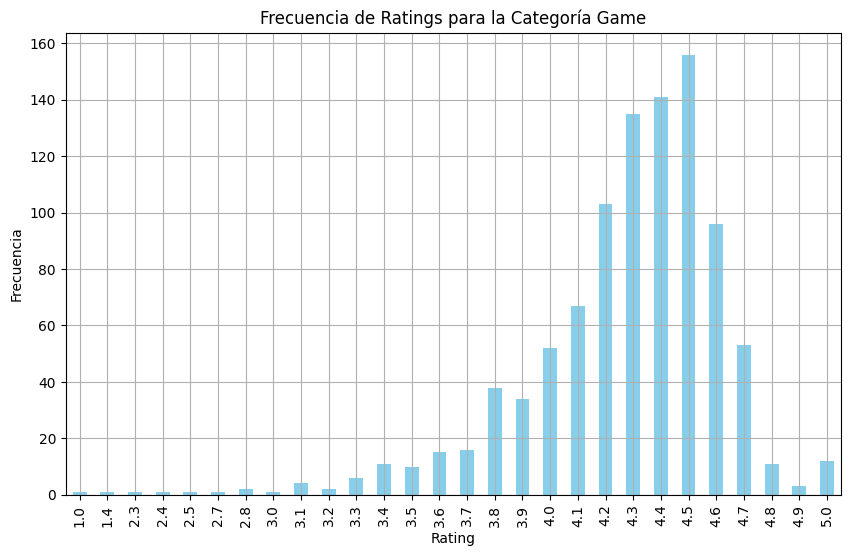

In [39]:
# Revisamos como se comporta con Game
plt.figure(figsize=(10, 6))
df_game['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Ratings para la Categoría Game')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


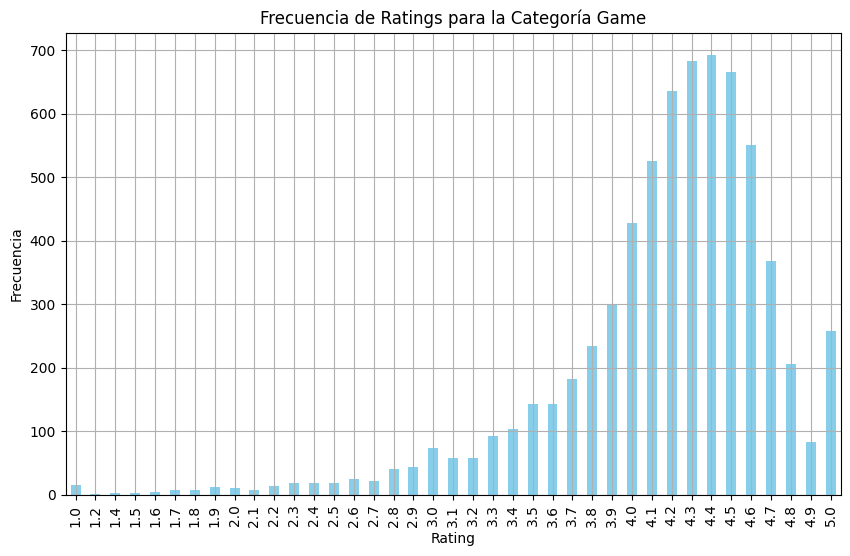

In [40]:
# Como se comporta con el resto de las categorias.

plt.figure(figsize=(10, 6))
df_others['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Ratings para la Categoría Game')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [41]:
df_game.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,974.0,4.269507e+00,3.771538e-01,1.0,4.10,4.3,4.5,5.000000e+00
Reviews,974.0,1.386276e+06,4.384507e+06,1.0,2704.25,47671.0,503444.5,4.489389e+07
Size,974.0,4.682782e+01,3.955096e+01,1.1,23.00,43.0,66.0,6.910000e+02
Installs,974.0,3.067192e+07,1.018852e+08,1.0,100000.00,1000000.0,10000000.0,1.000000e+09
Type,974.0,7.700205e-02,2.667317e-01,0.0,0.00,0.0,0.0,1.000000e+00
Price,974.0,2.817043e-01,1.338176e+00,0.0,0.00,0.0,0.0,1.799000e+01


In [42]:
df_others.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,6749.0,4.160142e+00,5.634067e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,6749.0,1.373932e+05,1.003529e+06,1.0,82.0,1511.0,26875.0,4.488145e+07
Size,6749.0,3.593306e+01,9.885652e+01,1.0,5.5,14.0,31.0,9.940000e+02
Installs,6749.0,5.213312e+06,3.606037e+07,1.0,10000.0,100000.0,1000000.0,1.000000e+09
Type,6749.0,7.438139e-02,2.624100e-01,0.0,0.0,0.0,0.0,1.000000e+00
Price,6749.0,1.250329e+00,1.861192e+01,0.0,0.0,0.0,0.0,4.000000e+02


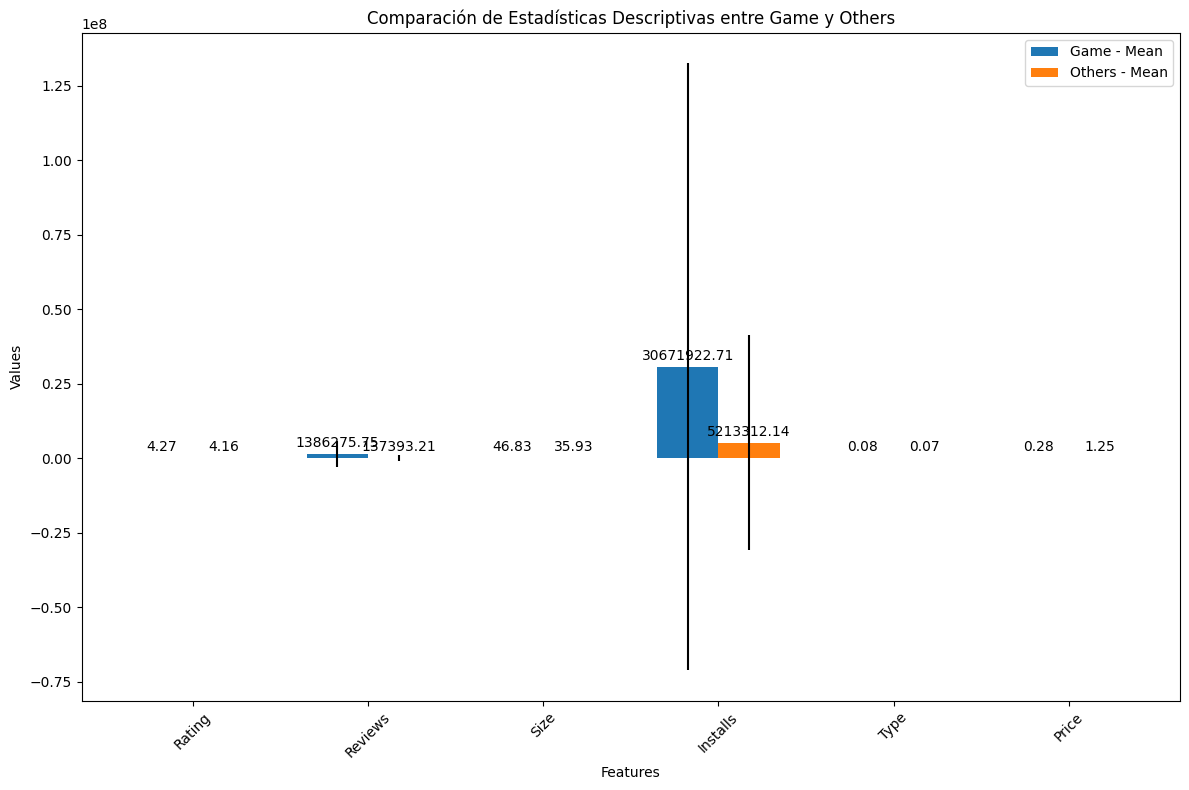

In [43]:
# Asumiendo que df_game_stats y df_others_stats contienen el resultado de df.describe().T
df_game_stats = df_game.describe().T
df_others_stats = df_others.describe().T

# Características a comparar
features = df_game_stats.index

# Crear el gráfico
x = np.arange(len(features))  # Posiciones de las barras
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 8))

# Barras para el grupo Game
bars1 = ax.bar(x - width/2, df_game_stats['mean'], width, label='Game - Mean', yerr=df_game_stats['std'])

# Barras para el grupo Others
bars2 = ax.bar(x + width/2, df_others_stats['mean'], width, label='Others - Mean', yerr=df_others_stats['std'])

# Añadir etiquetas y títulos
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Comparación de Estadísticas Descriptivas entre Game y Others')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45)
ax.legend()

# Añadir etiquetas para valores encima de las barras
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


In [44]:
# La cateogria Game obtiene en promedio más reviews y más descargas que el resto de las categorias.

In [45]:
genres_distribution_game = df_game['Genres'].value_counts(normalize=True)
genres_distribution_others = df_others['Genres'].value_counts(normalize=True)

print(f"Distribución de Géneros para la categoría 'Game':\n{genres_distribution_game}")
print(f"Distribución de Géneros para otras categorías:\n{genres_distribution_others}")


Distribución de Géneros para la categoría 'Game':
Genres
Action                           0.330595
Arcade                           0.190965
Racing                           0.085216
Adventure                        0.069815
Card                             0.040041
Board                            0.039014
Casual                           0.035934
Puzzle                           0.033881
Casino                           0.032854
Trivia                           0.027721
Word                             0.024641
Strategy                         0.022587
Role Playing                     0.015400
Music                            0.015400
Sports                           0.014374
Simulation                       0.009240
Adventure;Action & Adventure     0.005133
Action;Action & Adventure        0.002053
Simulation;Education             0.001027
Casual;Brain Games               0.001027
Simulation;Action & Adventure    0.001027
Casual;Pretend Play              0.001027
Casual;Creativity  

In [46]:
  # La mayoria de los Game se concentran en el genero "Action"

### Creación del modelo para comprobar nuestra hipotesis.

In [47]:
df_game_paid = df_game[df_game['Type'] == 1]

In [48]:
df_game_paid.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1831,The Game of Life,GAME,4.4,18621,63.0,100000,1,2.99,Everyone,Board,"July 4, 2018",2.1.2,4.4 and up
1832,Clue,GAME,4.6,19922,35.0,100000,1,1.99,Everyone 10+,Board,"July 30, 2018",2.2.5,5.0 and up
1833,The Room: Old Sins,GAME,4.9,21119,48.0,100000,1,4.99,Everyone,Puzzle,"April 18, 2018",1.0.1,4.4 and up
1834,The Escapists,GAME,4.4,7412,84.0,100000,1,4.99,Teen,Strategy,"April 26, 2018",1.1.0,2.3 and up
1835,Farming Simulator 18,GAME,4.5,18125,15.0,100000,1,4.99,Everyone,Simulation;Education,"July 9, 2018",Varies with device,4.4 and up
1836,RollerCoaster Tycoon® Classic,GAME,4.6,10795,69.0,100000,1,5.99,Everyone,Simulation,"December 21, 2017",1.2.1.1712080,4.0.3 and up
1837,Call of Duty:Black Ops Zombies,GAME,4.2,13004,46.0,100000,1,6.99,Teen,Action,"December 20, 2016",1.0.11,2.3.3 and up
1838,Star Wars ™: DIRTY,GAME,4.5,38207,15.0,100000,1,9.99,Teen,Role Playing,"October 19, 2015",1.0.6,4.1 and up
1839,Monument Valley 2,GAME,4.6,9394,33.0,100000,1,4.99,Everyone,Puzzle,"November 30, 2017",1.2.9,4.4 and up
3968,B-52 Spirits of Glory Deluxe,GAME,4.3,12,29.0,100,1,0.99,Everyone,Arcade,"September 2, 2017",1.5.9,2.3 and up


In [49]:
df_game_paid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 1831 to 10782
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             75 non-null     object 
 1   Category        75 non-null     object 
 2   Rating          75 non-null     float64
 3   Reviews         75 non-null     int64  
 4   Size            75 non-null     float64
 5   Installs        75 non-null     int64  
 6   Type            75 non-null     int64  
 7   Price           75 non-null     float64
 8   Content Rating  75 non-null     object 
 9   Genres          75 non-null     object 
 10  Last Updated    75 non-null     object 
 11  Current Ver     75 non-null     object 
 12  Android Ver     75 non-null     object 
dtypes: float64(3), int64(3), object(7)
memory usage: 10.3+ KB


In [50]:
# Para nuestro modelo solo vamos a trabajar con las siguientes columnas :  ['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']
# Dropeamos el resto.
# Además, solo vamos a trabajar con las aplicaciones de pago

columns_to_keep = ['Rating', 'Reviews', 'Size', 'Installs', 'Content Rating', 'Price', 'Type']
df_game_paid = df[columns_to_keep]



In [51]:
df_game_paid.head(5)

,Rating,Reviews,Size,Installs,Content Rating,Price,Type
0,4.1,159,19.0,10000,Everyone,0.0,0
1,3.9,967,14.0,500000,Everyone,0.0,0
2,4.7,87510,8.7,5000000,Everyone,0.0,0
3,4.5,215644,25.0,50000000,Teen,0.0,0
4,4.3,967,2.8,100000,Everyone,0.0,0


In [52]:
df_game_paid = df_game_paid[df_game_paid['Type'] == 1]

In [53]:
df_game_paid.head(5)

,Rating,Reviews,Size,Installs,Content Rating,Price,Type
234,4.7,11442,6.8,100000,Everyone,4.99,1
235,4.8,10295,39.0,100000,Everyone,4.99,1
290,4.7,11442,6.8,100000,Everyone,4.99,1
291,4.8,10295,39.0,100000,Everyone,4.99,1
477,2.6,57,6.2,1000,Everyone,6.99,1


In [54]:
df_game_paid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 234 to 10785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          577 non-null    float64
 1   Reviews         577 non-null    int64  
 2   Size            577 non-null    float64
 3   Installs        577 non-null    int64  
 4   Content Rating  577 non-null    object 
 5   Price           577 non-null    float64
 6   Type            577 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 36.1+ KB


In [55]:
# One-Hot Encoding para 'Content Rating'
df_game_paid = pd.get_dummies(df_game_paid, columns=['Content Rating'], drop_first=True)


In [56]:
# Manejo de datos numéricos
# Seleccionar todas las columnas menos 'Price' y 'Type'
X = df_game_paid.drop(['Price', 'Type'], axis=1)
y = df_game_paid['Price']

In [57]:
X

,Rating,Reviews,Size,Installs,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
234,4.7,11442,6.8,100000,False,False,False
235,4.8,10295,39.0,100000,False,False,False
290,4.7,11442,6.8,100000,False,False,False
291,4.8,10295,39.0,100000,False,False,False
477,2.6,57,6.2,1000,False,False,False
...,...,...,...,...,...,...,...
10690,5.0,5,861.0,100,False,False,False
10697,5.0,2,16.0,1,False,False,False
10760,4.4,35,2.4,1000,False,False,False
10782,3.8,252,11.0,10000,False,False,True


In [58]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Definir los modelos
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor()
}


In [61]:
# Definir parámetros para GridSearchCV
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200]
    }
}

In [62]:
# Entrenar y ajustar modelos
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    # Imprimir los mejores parámetros encontrados
    print(f"Mejores parámetros para {name}: {grid_search.best_params_}")


Mejores parámetros para Random Forest: {'max_depth': None, 'n_estimators': 100}
Mejores parámetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Mejores parámetros para AdaBoost: {'n_estimators': 50}


In [63]:
# Mejores parámetros para Random Forest: {'max_depth': None, 'n_estimators': 200}
# Mejores parámetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
# Mejores parámetros para AdaBoost: {'n_estimators': 200}

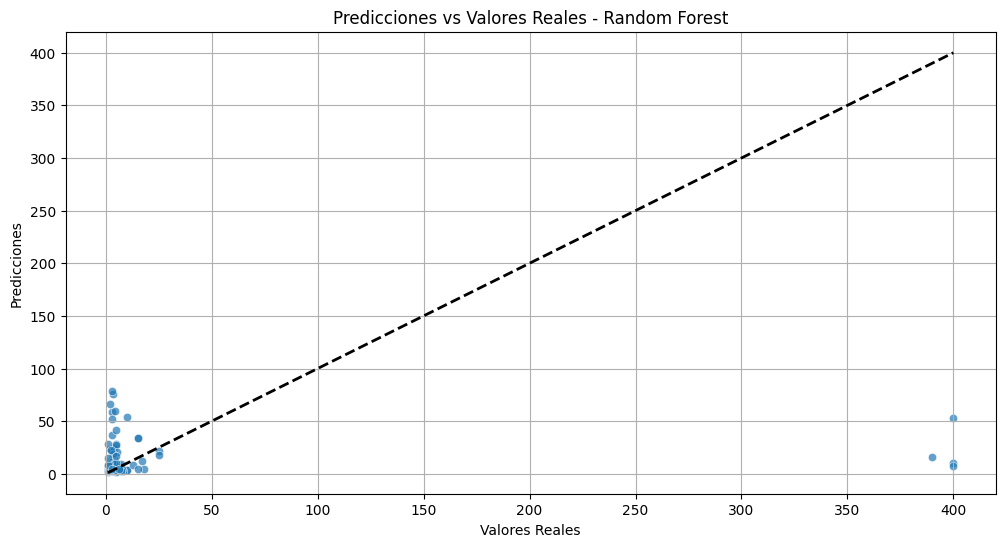

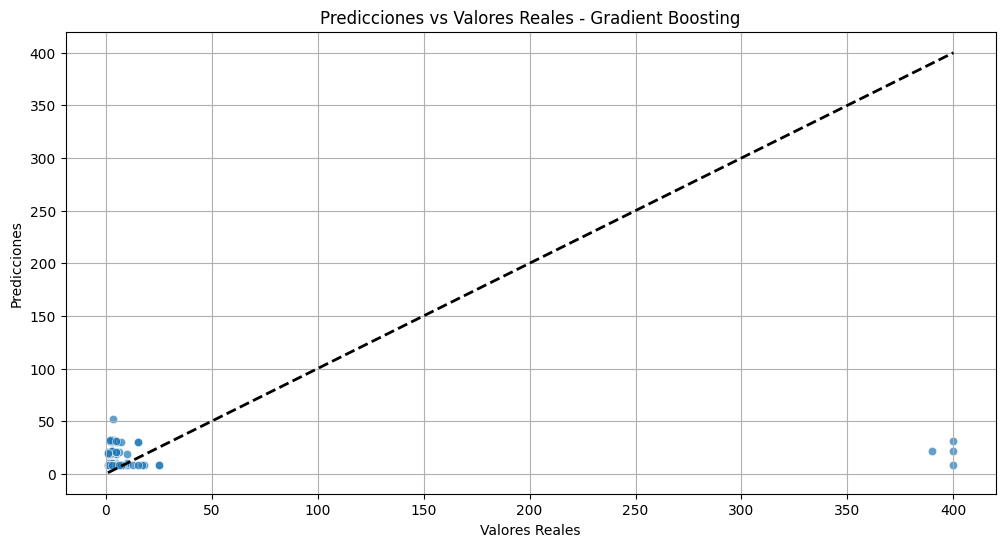

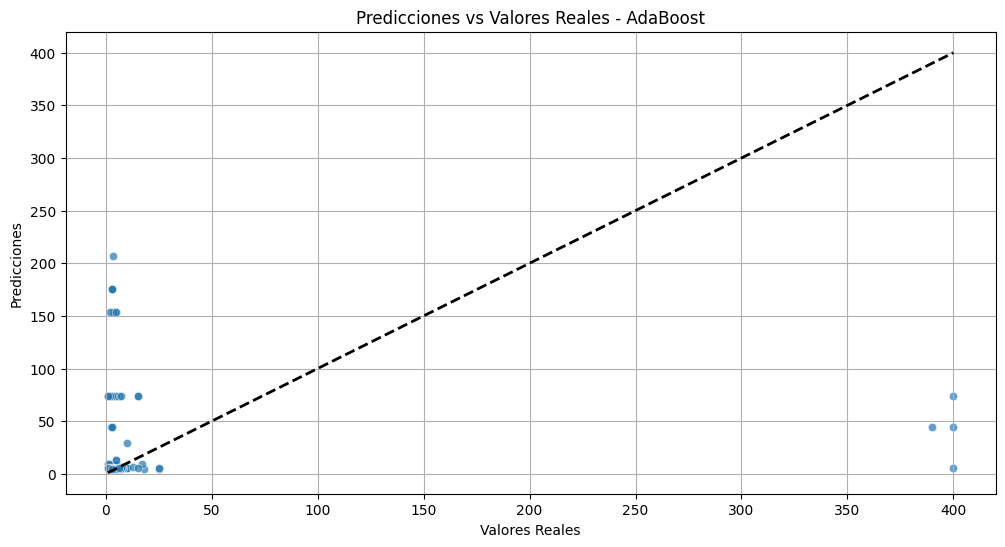

In [64]:
# Evaluar modelos
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

    # Graficar las predicciones frente a los valores reales
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="w", linewidth=0.5)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Predicciones vs Valores Reales - {name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.grid(True)
    plt.show()

In [65]:
# Imprimir resultados de rendimiento
print("Resultados de rendimiento de los modelos:")
for name, metrics in results.items():
    print(f"\nModelo: {name}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"R-squared (R2): {metrics['R2']}")

Resultados de rendimiento de los modelos:

Modelo: Random Forest
Mean Squared Error (MSE): 5194.391914420257
R-squared (R2): -0.006418028059542058

Modelo: Gradient Boosting
Mean Squared Error (MSE): 5080.810097419081
R-squared (R2): 0.015588549451947431

Modelo: AdaBoost
Mean Squared Error (MSE): 6834.330908974304
R-squared (R2): -0.32415765884387815


In [66]:
# Gradient Boosting tiene el MSE más bajo entre los tres, lo que significa que, en promedio, sus predicciones están más cerca de los valores reales que las de los otros modelos. Aunque el R² es muy bajo y aún negativo, el modelo está funcionando ligeramente mejor que Random Forest en términos de MSE.

In [67]:
#  Entrenar el modelo
# Mejores parámetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

best_models = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=3)
best_models.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01)

### Prediccioón

In [68]:
# Probamos el modelo con una predicción.

In [69]:
data_ficticios = {
    'Rating': [3.8],  # Ejemplos de ratings
    'Reviews': [5200],  # Ejemplos de reviews
    'Size': [48.0],  # Ejemplos de tamaño en MB
    'Installs': [500000],  # Ejemplos de instalaciones
    'Content Rating_Everyone 10+': [0],  # Ejemplos de codificación one-hot
    'Content Rating_Mature 17+': [1],
    'Content Rating_Teen': [0]
}

In [70]:
# Crear DataFrame para los datos ficticios
df_ficticios = pd.DataFrame(data_ficticios)

In [71]:
# Escalar las características de los datos ficticios usando el mismo escalador
scaler = StandardScaler()
X_ficticios = scaler.fit_transform(df_ficticios)

In [72]:
# Realizar la predicción con el modelo entrenado
predicciones = best_models.predict(X_ficticios)

# Mostrar las predicciones
print("Predicciones para datos ficticios:")
print(predicciones)

Predicciones para datos ficticios:
[8.16123987]


In [73]:

# Guardar el modelo
joblib.dump(best_models, 'best_models.pkl')


['best_models.pkl']

In [74]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']